### Nama: Farhan Riyandi
### Email: farhanriyandi20@gmail.com
### ID Dicoding: farhan_riyandi_uyhY

Sumber: https://www.kaggle.com/datasets/gargmanas/movierecommenderdataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd

movie = pd.read_csv('/content/drive/MyDrive/Machine Learning Terapan/Sistem Rekomendasi/movies.csv')
rating = pd.read_csv('/content/drive/MyDrive/Machine Learning Terapan/Sistem Rekomendasi/ratings.csv')

In [ ]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Univariate Exploratory Data Analysis

### Movie Variable

In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
print('Banyak tipe genre: ', len(movie.genres.unique()))
print('Tipe genre: ', movie.genres.unique())

Banyak tipe genre:  951
Tipe genre:  ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Sci-Fi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'
 'Mystery|Sci-Fi|Thriller' 'Children|Comedy' 'Drama|War'
 'Action|Crime|Drama' 'Action|Adventure|Fantasy' 'Comedy|Drama|Thriller'
 'Mystery|Thriller' 'Animation|Children|Drama|Musical|Romance'
 'Crime|Mystery|Thriller' 'Adventure|Drama' 'Drama|Thriller'
 'Comedy|Crime' 'Action|Sci-Fi|Thriller' 'Action|Comedy|Horror|Thriller'
 'Comedy|Drama' 'Documentary' 'Action|Crime|Drama|Thriller'
 'Crime|Drama|Romance' 'Action|Adventure|Drama' 'Action|Thriller'
 'Drama|Horr

### Rating Variabel

In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
rating.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Dari output di atas, diketahui bahwa nilai maksimum rating adalah 5 dan nilai minimumnya adalah 0.5. Artinya, skala rating berkisar antara 0.5 hingga 5.

In [ ]:
print('Jumlah userId: ', len(rating.userId.unique()))
print('Jumlah movieId: ', len(rating.movieId.unique()))
print('Jumlah data rating: ', len(rating))

Jumlah userId:  610
Jumlah movieId:  9724
Jumlah data rating:  100836


Pengguna yang memberikan rating 610, jumlah movie 9724, dan jumlah rating adalah 100836

In [ ]:
import matplotlib.pyplot as plt

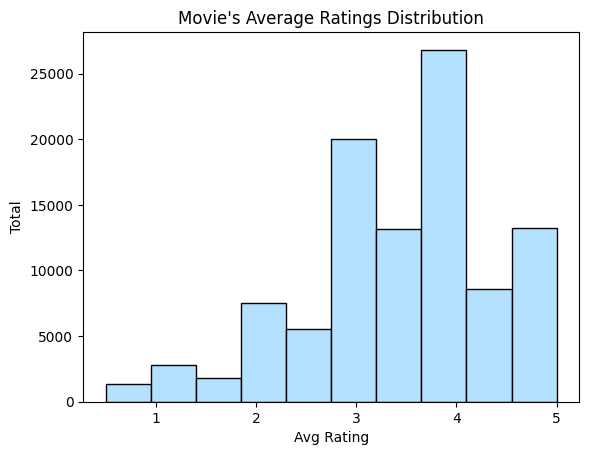

In [ ]:

# Movie's Average Ratings Distribution
plt.hist(rating.rating, color='#B4E1FF', edgecolor='black')
plt.ylabel('Total')
plt.xlabel('Avg Rating')
plt.title("Movie's Average Ratings Distribution")
plt.show()

Dapat dilihat bahwa sebagian besar rata-rata peringkat movie tersebar dari rating 3 sampai 5.

# Data Preprocessing

# Menggabungkan Data

In [ ]:
# Menggabungkan dataframe rating dengan movie berdasarkan nilai movieId
movies = pd.merge(rating, movie, on='movieId', how='left')
movies.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [ ]:
movies.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [ ]:
movies.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


# Data Preparation

In [ ]:
# Mengurutkan movie berdasarkan movieID kemudian memasukkannya ke dalam variabel fix_movie
fix_movie = movies.sort_values('movieId', ascending=True)
fix_movie.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
81531,517,1,4.0,1487954343,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
30517,213,1,3.5,1316196157,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
81082,514,1,4.0,1533872400,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
30601,214,1,3.0,853937855,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
fix_movie.shape

(100836, 6)

In [ ]:
# Mengecek berapa jumlah fix_movie
len(fix_movie.movieId.unique())

9724

In [ ]:
# Membuat variabel preparation yang berisi dataframe fix_movie
preparation = fix_movie
preparation

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
81531,517,1,4.0,1487954343,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
30517,213,1,3.5,1316196157,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
81082,514,1,4.0,1533872400,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
30601,214,1,3.0,853937855,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
27256,184,193581,4.0,1537109082,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
27257,184,193583,3.5,1537109545,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
27258,184,193585,3.5,1537109805,Flint (2017),Drama
27259,184,193587,3.5,1537110021,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('movieId')
preparation

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
42115,288,2,2.0,978467973,Jumanji (1995),Adventure|Children|Fantasy
43169,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance
38179,262,4,1.0,840306203,Waiting to Exhale (1995),Comedy|Drama|Romance
77224,483,5,2.5,1327277284,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...
27256,184,193581,4.0,1537109082,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
27257,184,193583,3.5,1537109545,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
27258,184,193585,3.5,1537109805,Flint (2017),Drama
27259,184,193587,3.5,1537110021,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
# Mengonversi data series ‘movieId’ menjadi dalam bentuk list
movie_id = preparation['movieId'].tolist()

# Mengonversi data series ‘title’ menjadi dalam bentuk list
title = preparation['title'].tolist()

# Mengonversi data series ‘genres’ menjadi dalam bentuk list
genres = preparation['genres'].tolist()

print(len(movie_id))
print(len(title))
print(len(genres))

9724
9724
9724


In [ ]:
# Membuat dictionary untuk data ‘movie_id’, ‘title’, dan ‘genres’
movie_new = pd.DataFrame({
    'id': movie_id,
    'title': title,
    'genres': genres
})
movie_new

,id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9721,193585,Flint (2017),Drama
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
movie_new.shape

(9724, 3)

# Model Development dengan Content Based Filtering

In [ ]:
data = movie_new
data.sample(5)

,id,title,genres
9484,170837,Life-Size (2000),Children|Comedy|Fantasy
2119,2817,Aces: Iron Eagle III (1992),Action
785,1028,Mary Poppins (1964),Children|Comedy|Fantasy|Musical
7038,69394,"Stoning of Soraya M., The (2008)",Crime|Drama
7070,70183,"Ugly Truth, The (2009)",Comedy|Drama|Romance


# TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data cuisine
tf.fit(data['genres'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres',
       'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western'], dtype=object)

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['genres'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(9724, 24)

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.41681721, 0.51634045, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.51235785, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.57836121, 0.        , 0.8157808 , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan nama resto

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.title
).sample(22, axis=1).sample(10, axis=0)

,documentary,musical,horror,listed,adventure,genres,comedy,no,drama,mystery,...,fi,imax,film,crime,children,thriller,noir,western,sci,fantasy
title,,,,,,,,,,,,,,,,,,,,,
Get on Up (2014),0.00000,0.924337,0.0,0.0,0.000000,0.0,0.000000,0.0,0.381576,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Picture Bride (Bijo photo) (1994),0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.540394,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Desperado (1995),0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.793723,0.000000,0.000000
Block Party (a.k.a. Dave Chappelle's Block Party) (2005),0.90282,0.000000,0.0,0.0,0.000000,0.0,0.430018,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Double Take (2001),0.00000,0.000000,0.0,0.0,0.000000,0.0,0.590025,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
"Twilight Saga: Breaking Dawn - Part 2, The (2012)",0.00000,0.000000,0.0,0.0,0.396033,0.0,0.000000,0.0,0.234989,0.0,...,0.000000,0.665898,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.458961
The Second Renaissance Part II (2003),0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.549803,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.549803,0.000000
Howling II: Your Sister Is a Werewolf (1985),0.00000,0.000000,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Paddington (2014),0.00000,0.000000,0.0,0.0,0.000000,0.0,0.468306,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.883567,0.0,0.0,0.000000,0.000000,0.000000


# Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.81352752, 0.15262722, ..., 0.        , 0.42122062,
        0.26751731],
       [0.81352752, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15262722, 0.        , 1.        , ..., 0.        , 0.        ,
        0.57053212],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.42122062, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.26751731, 0.        , 0.57053212, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama title
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=data['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9724, 9724)


title,"River, The (1984)",Hommage à Zgougou (et salut à Sabine Mamou) (2002),"Cocoanuts, The (1929)",Company Man (2000),"Inkwell, The (1994)"
title,,,,,
Hellraiser III: Hell on Earth (1992),0.000000,0.0,0.000000,0.000000,0.000000
Man of Steel (2013),0.000000,0.0,0.000000,0.000000,0.000000
Elizabethtown (2005),0.466539,0.0,0.205750,0.504636,0.687253
Revenge of the Green Dragons (2014),0.403822,0.0,0.000000,0.000000,0.274133
Who Killed the Electric Car? (2006),0.000000,1.0,0.000000,0.000000,0.000000
Snow White and the Seven Dwarfs (1937),0.228181,0.0,0.504719,0.000000,0.154900
"Rocker, The (2008)",0.000000,0.0,0.407720,1.000000,0.734280
Boyz N the Hood (1991),0.503700,0.0,0.000000,0.000000,0.341935
Faust (1926),0.350226,0.0,0.000000,0.000000,0.237749


In [ ]:
def movie_recommendations(title, similarity_data=cosine_sim_df, items=data[['title', 'genres']], k=10):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop title agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
data[data['title'] == 'Lover Come Back (1961)']

,id,title,genres
5169,8385,Lover Come Back (1961),Comedy|Romance


In [ ]:
# Mendapatkan rekomendasi movie yang mirip dengan Lover Come Back (1961)
movie_recommendations('Lover Come Back (1961)')

,title,genres
0,Shall We Dance? (2004),Comedy|Romance
1,The Importance of Being Earnest (1952),Comedy|Romance
2,Good Luck Chuck (2007),Comedy|Romance
3,Mo' Money (1992),Comedy|Romance
4,Mr. Deeds (2002),Comedy|Romance
5,Kiss me Kismet (2006),Comedy|Romance
6,When Harry Met Sally... (1989),Comedy|Romance
7,Better Off Dead... (1985),Comedy|Romance
8,Impromptu (1991),Comedy|Romance
9,27 Dresses (2008),Comedy|Romance


# Model Development dengan Collaborative Filtering

# Data Understanding

In [ ]:
# Import library
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

In [ ]:
# Membaca dataset

df = rating
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Data Preparation

In [ ]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
print('list userId: ', user_ids)

list userId:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [ ]:
# Melakukan encoding userId
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

encoded userID :  {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 49, 51: 50, 52: 51, 53: 52, 54: 53, 55: 54, 56: 55, 57: 56, 58: 57, 59: 58, 60: 59, 61: 60, 62: 61, 63: 62, 64: 63, 65: 64, 66: 65, 67: 66, 68: 67, 69: 68, 70: 69, 71: 70, 72: 71, 73: 72, 74: 73, 75: 74, 76: 75, 77: 76, 78: 77, 79: 78, 80: 79, 81: 80, 82: 81, 83: 82, 84: 83, 85: 84, 86: 85, 87: 86, 88: 87, 89: 88, 90: 89, 91: 90, 92: 91, 93: 92, 94: 93, 95: 94, 96: 95, 97: 96, 98: 97, 99: 98, 100: 99, 101: 100, 102: 101, 103: 102, 104: 103, 105: 104, 106: 105, 107: 106, 108: 107, 109: 108, 110: 109, 111: 110, 112: 111, 113: 112, 114: 113, 115: 114, 116: 115, 117: 116, 118: 117, 119: 118, 120: 119,

In [ ]:
# Melakukan proses encoding angka ke ke userId
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

encoded angka ke userID:  {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 35, 35: 36, 36: 37, 37: 38, 38: 39, 39: 40, 40: 41, 41: 42, 42: 43, 43: 44, 44: 45, 45: 46, 46: 47, 47: 48, 48: 49, 49: 50, 50: 51, 51: 52, 52: 53, 53: 54, 54: 55, 55: 56, 56: 57, 57: 58, 58: 59, 59: 60, 60: 61, 61: 62, 62: 63, 63: 64, 64: 65, 65: 66, 66: 67, 67: 68, 68: 69, 69: 70, 70: 71, 71: 72, 72: 73, 73: 74, 74: 75, 75: 76, 76: 77, 77: 78, 78: 79, 79: 80, 80: 81, 81: 82, 82: 83, 83: 84, 84: 85, 85: 86, 86: 87, 87: 88, 88: 89, 89: 90, 90: 91, 91: 92, 92: 93, 93: 94, 94: 95, 95: 96, 96: 97, 97: 98, 98: 99, 99: 100, 100: 101, 101: 102, 102: 103, 103: 104, 104: 105, 105: 106, 106: 107, 107: 108, 108: 109, 109: 110, 110: 111, 111: 112, 112: 113, 113: 114, 114: 115, 115: 116, 116: 117, 117: 118, 118: 119, 1

In [ ]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()

# Melakukan proses encoding placeID
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke placeID
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

In [ ]:
# Mapping userID ke dataframe user
df['user'] = df['userId'].map(user_to_user_encoded)

# Mapping movieId ke dataframe movie
df['movie'] = df['movieId'].map(movie_to_movie_encoded)

In [ ]:
df.head()

,userId,movieId,rating,timestamp,user,movie
0,1,1,4.0,964982703,0,0
1,1,3,4.0,964981247,0,1
2,1,6,4.0,964982224,0,2
3,1,47,5.0,964983815,0,3
4,1,50,5.0,964982931,0,4


In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah movie
num_movie = len(movie_encoded_to_movie)
print(num_movie)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of Movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

610
9724
Number of User: 610, Number of Movie: 9724, Min Rating: 0.5, Max Rating: 5.0


# Membagi Data untuk Training dan Validasi

In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,user,movie
67037,432,77866,4.5,1335139641,431,4730
42175,288,474,3.0,978465565,287,474
93850,599,4351,3.0,1498524542,598,2631
6187,42,2987,4.0,996262677,41,194
12229,75,1610,4.0,1158989841,74,727
...,...,...,...,...,...,...
6265,42,4005,4.0,996259059,41,1873
54886,364,141,4.0,869443367,363,524
76820,480,6867,4.0,1179163171,479,2240
860,6,981,3.0,845556567,5,712


In [ ]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['user', 'movie']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((80668, 2), (20168, 2), (80668,), (20168,))

# Proses Training

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movie
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movie bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (x_val, y_val)
)

Epoch 1/10
1261/1261 [==============================] - 17s 14ms/step - loss: 0.6098 - root_mean_squared_error: 0.2044 - val_loss: 0.6139 - val_root_mean_squared_error: 0.2077
Epoch 2/10
1261/1261 [==============================] - 16s 12ms/step - loss: 0.6083 - root_mean_squared_error: 0.2027 - val_loss: 0.6148 - val_root_mean_squared_error: 0.2086
Epoch 3/10
1261/1261 [==============================] - 18s 14ms/step - loss: 0.6072 - root_mean_squared_error: 0.2013 - val_loss: 0.6120 - val_root_mean_squared_error: 0.2055
Epoch 4/10
1261/1261 [==============================] - 17s 13ms/step - loss: 0.6060 - root_mean_squared_error: 0.1997 - val_loss: 0.6113 - val_root_mean_squared_error: 0.2046
Epoch 5/10
1261/1261 [==============================] - 12s 9ms/step - loss: 0.6059 - root_mean_squared_error: 0.1995 - val_loss: 0.6114 - val_root_mean_squared_error: 0.2047
Epoch 6/10
1261/1261 [==============================] - 12s 10ms/step - loss: 0.6051 - root_mean_squared_error: 0.1983 - 

# Visualisasi Metrik

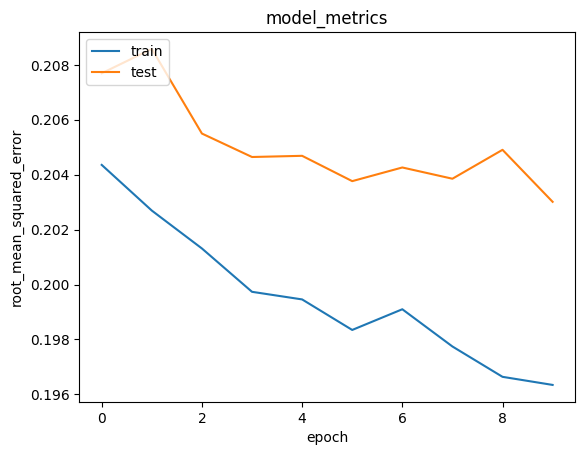

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Mendapatkan Rekomendasi Movie

In [ ]:
movie_df = movie_new
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Terapan/Sistem Rekomendasi/ratings.csv')

# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
movie_not_watched = movie_df[~movie_df['id'].isin(movie_watched_by_user.movieId.values)]['id']
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

In [ ]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ':', row.genres)

print('----' * 8)
print('Top 10 movies recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title, ':', row.genres)

291/291 [==============================] - 1s 4ms/step
Showing recommendations for users: 42
Movie with high ratings from user
--------------------------------
Time to Kill, A (1996) : Drama|Thriller
Doors, The (1991) : Drama
Top Gun (1986) : Action|Romance
On Golden Pond (1981) : Drama
Saving Private Ryan (1998) : Action|Drama|War
--------------------------------
Top 10 movies recommendation
--------------------------------
Rear Window (1954) : Mystery|Thriller
Cinema Paradiso (Nuovo cinema Paradiso) (1989) : Drama
Cool Hand Luke (1967) : Drama
This Is Spinal Tap (1984) : Comedy
Sweet Hereafter, The (1997) : Drama
Zero Effect (1998) : Comedy|Mystery|Thriller
Boondock Saints, The (2000) : Action|Crime|Drama|Thriller
Lord of the Rings: The Two Towers, The (2002) : Adventure|Fantasy
Departed, The (2006) : Crime|Drama|Thriller
Dark Knight, The (2008) : Action|Crime|Drama|IMAX
